## Import libraries 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,8]
import pandas as pd

In [2]:
data = pd.read_csv('binclassv2.txt',names=['X1', 'X2', 'y'])

In [3]:
data.head()

,X1,X2,y
0,20.0,-30.0,1
1,30.0,-30.0,1
2,40.0,-30.0,1
3,40.0,-20.0,1
4,40.0,-10.0,1


In [4]:
y_p=data[data['y'] == 1]
y_n=data[data['y'] == -1]
x1x2_p=y_p[["X1","X2"]]
x1x2_n=y_n[["X1","X2"]]
p_color = 'red'
n_color ='blue'

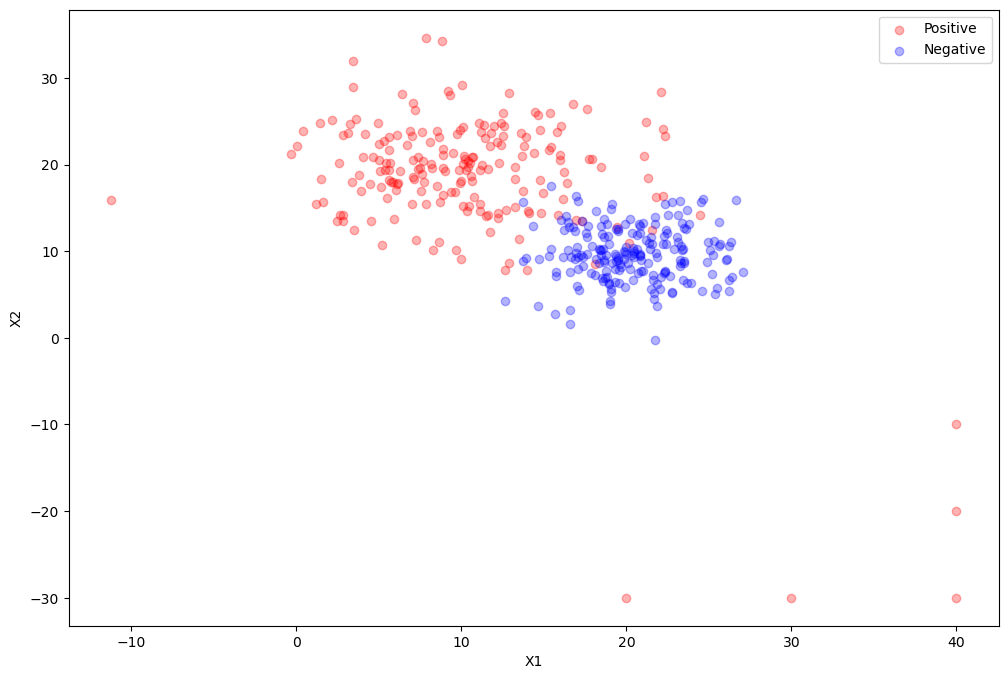

In [5]:
plt.scatter(x1x2_p.X1,x1x2_p.X2, alpha=0.3, c = p_color, label='Positive')
plt.scatter(x1x2_n.X1,x1x2_n.X2, alpha=0.3, c = n_color, label='Negative')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2');

In [6]:
def gaussian_stats(X):
    mu = np.mean(X,0)
    sigma = np.cov(X,rowvar=False)
    return mu, sigma




def mv_gaussian_mle_fit(X):
    mu, sigma = gaussian_stats(X)
    return st.multivariate_normal(mu, sigma)


In [7]:
import sys
# need to add main repo directory to the system path used for searching packages
sys.path.append("../../") 
from mchlearn.plotting import confidence_ellipse

In [8]:
mu_p,cov_p=gaussian_stats(x1x2_p)
mu_n,cov_n=gaussian_stats(x1x2_n)

In [9]:
def x1x2_plot(**kwargs):
    fig, ax = plt.subplots()
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    return fig,ax

In [10]:
def x1x2_scatter(fig,ax):
    ax.scatter(x1x2_p.X1, x1x2_p.X2, alpha=0.3, c = p_color, label='Positive');
    ax.scatter(x1x2_n.X1, x1x2_n.X2, alpha=0.3, c = n_color, label='Negative')
    ax.legend();

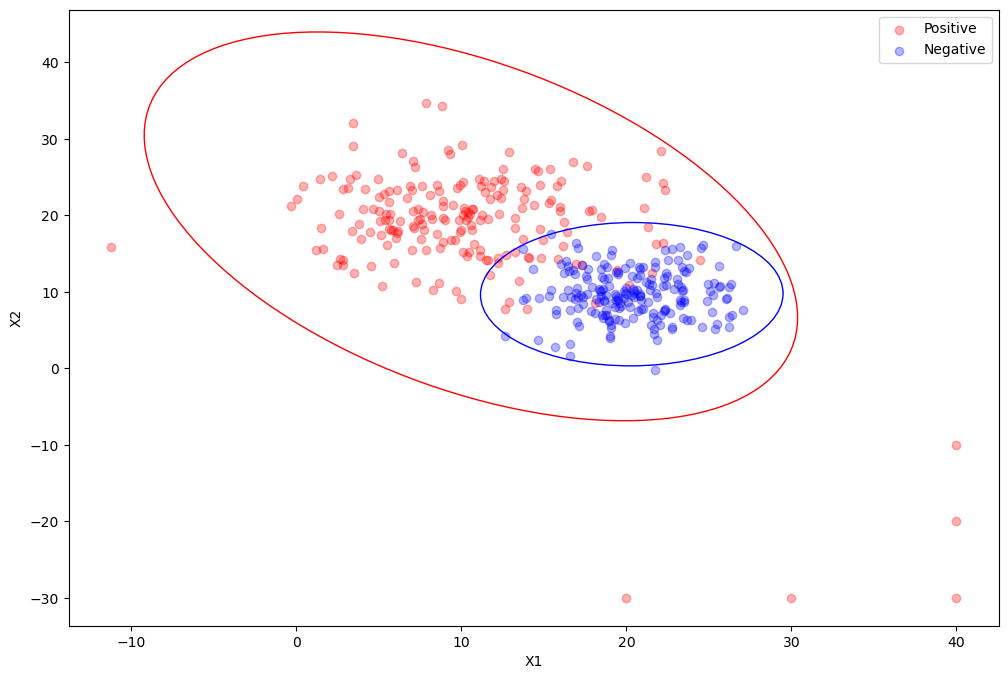

In [11]:
figure, axes = x1x2_plot()
x1x2_scatter(figure, axes)
confidence_ellipse(mu_p, cov_p, axes, edgecolor = p_color)
confidence_ellipse(mu_n, cov_n, axes, edgecolor = n_color);

In [12]:
pr_p = 0.5
pr_n = 0.5
distrib_p = mv_gaussian_mle_fit(x1x2_p)
distrib_n = mv_gaussian_mle_fit(x1x2_n)

In [13]:
def prob_F_cond_x1x2(x1x2):
    p_pos  = distrib_p.pdf(x1x2)*pr_p
    p_neg = distrib_n.pdf(x1x2)*pr_n
    prob_F = p_pos/(p_pos+p_neg)
    return prob_F

In [14]:
# this is the posterior
posterior = prob_F_cond_x1x2(x1x2_p)

In [15]:
x1s = np.linspace(data.min()['X1'],
                  data.max()['X1'],
                  100)
x2s = np.linspace(data.min()['X2'],
                  data.max()['X2'], 
                  100)

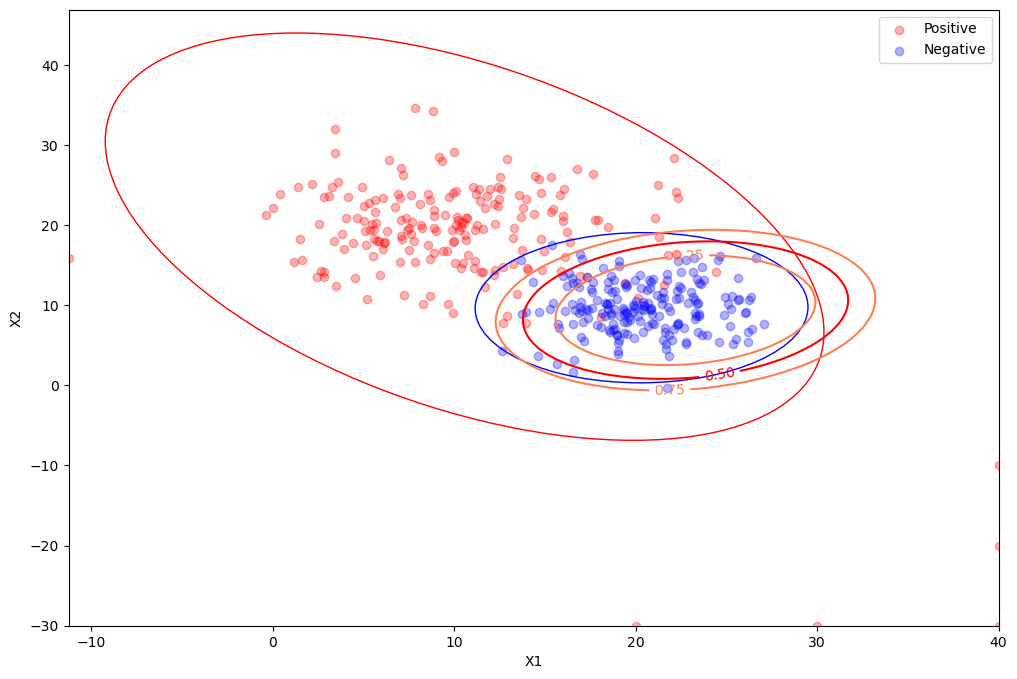

In [16]:
from mchlearn.plotting import grid
fig, ax = x1x2_plot()
x1x2_scatter(fig, ax)

confidence_ellipse(mu_p, cov_p, ax, edgecolor = p_color)
confidence_ellipse(mu_n, cov_n, ax, edgecolor = n_color)

cs = ax.contour(*grid(x1s,x2s,prob_F_cond_x1x2), [0.25, 0.5, 0.75], colors=['coral','red', 'coral'])
ax.clabel(cs);

In [17]:
def mv_gaussian_mle_fit_new(X,cov_all):
    mu, sigma = gaussian_stats(X)
    return st.multivariate_normal(mu, cov_all)

the second part in the first problem 

In [18]:
_,cov_all=gaussian_stats(data[['X1', 'X2']])
distrib_p = mv_gaussian_mle_fit_new(x1x2_p,cov_all)
distrib_n = mv_gaussian_mle_fit_new(x1x2_n,cov_all)
posterior = prob_F_cond_x1x2(x1x2_p)

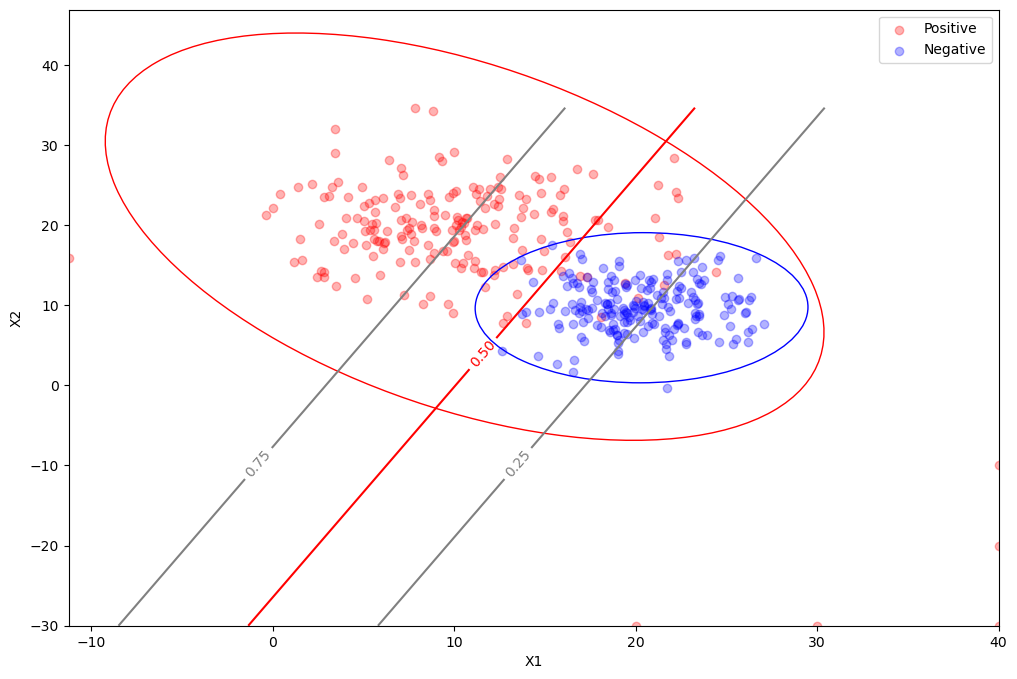

In [19]:
fig, ax = x1x2_plot()
x1x2_scatter(fig, ax)

confidence_ellipse(mu_p, cov_p, ax, edgecolor = p_color)
confidence_ellipse(mu_n, cov_n, ax, edgecolor = n_color)

cs = ax.contour(*grid(x1s,x2s,prob_F_cond_x1x2), [0.25, 0.5, 0.75], colors=['gray','red', 'gray']);
ax.clabel(cs);